In [1]:
import pandas as pd
import numpy as np

In [2]:
biz_df = pd.read_csv('C:/Users/Diya/OneDrive/Desktop/Mini Project/Datasets/biz_large.csv')

In [4]:
print(biz_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     79 non-null     object 
 1   tx_count                 79 non-null     int64  
 2   tx_sum_gbp               79 non-null     float64
 3   tx_mean_gbp              79 non-null     float64
 4   tx_median_gbp            79 non-null     float64
 5   customers_sorted_unique  79 non-null     object 
 6   customers_tx_count       79 non-null     object 
 7   industry_category        79 non-null     object 
dtypes: float64(3), int64(1), object(4)
memory usage: 5.1+ KB
None


In [3]:
biz_df.head(5)

,name,tx_count,tx_sum_gbp,tx_mean_gbp,tx_median_gbp,customers_sorted_unique,customers_tx_count,industry_category
0,ACCESSORY_SHOP,3325,74862.00,22.514887,22.00,"[1357.0, 1607.0, 1623.0, 1828.0, 1931.0, 2090....","[6, 10, 10, 5, 14, 6, 6, 7, 7, 5, 11, 9, 9, 9,...",Accessories
1,A_CAFE,475154,1144734.25,2.409186,2.40,"[1000.0, 1002.0, 1006.0, 1053.0, 1059.0, 1071....","[116, 53, 118, 55, 45, 55, 65, 57, 143, 50, 58...",Cafes
2,A_LOCAL_COFFEE_SHOP,474159,1141932.30,2.408332,2.40,"[1000.0, 1002.0, 1006.0, 1018.0, 1053.0, 1059....","[117, 46, 137, 4, 55, 40, 53, 55, 46, 130, 54,...",Cafes
3,A_SUPERMARKET,81335,5652778.58,69.499952,65.22,"[1000.0, 1002.0, 1006.0, 1018.0, 1053.0, 1059....","[2, 5, 16, 15, 3, 5, 4, 18, 16, 10, 11, 7, 4, ...",Supermarkets
4,BAR,770414,8458081.50,10.978619,11.00,"[1000.0, 1002.0, 1006.0, 1018.0, 1053.0, 1059....","[72, 110, 104, 110, 98, 82, 117, 71, 139, 65, ...",Pubs / Bars


In [5]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

C:\Users\Diya\New folder\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
# Extract relevant numerical features
numerical_features = biz_df[['tx_count', 'tx_sum_gbp', 'tx_mean_gbp', 'tx_median_gbp']]

# Normalize numerical features
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

In [7]:
# Train Isolation Forest model
isolation_forest = IsolationForest(contamination=0.1)  # Adjust contamination parameter as needed
isolation_forest.fit(numerical_features_scaled)

IsolationForest(contamination=0.1)

In [8]:
# Predict outliers/anomalies
outlier_preds = isolation_forest.predict(numerical_features_scaled)

# Anomalies will be labeled as -1, normal points as 1
anomalies = numerical_features[outlier_preds == -1]

In [9]:
# You can further analyze or visualize the anomalies
print(anomalies)

    tx_count   tx_sum_gbp  tx_mean_gbp  tx_median_gbp
4     770414   8458081.50    10.978619           11.0
13     24723   2828740.00   114.417344          114.0
18     24893   2876655.00   115.560800          116.0
21      1543    250739.00   162.500972          159.0
32      1604    264615.00   164.971945          165.0
44    649043   7116813.00    10.965087           11.0
51    834380  10639504.55    12.751390           11.5
66      1569    262087.00   167.040790          171.0


UNIVARIATE ANOMALY DETECTION
It calculates the Z-score for the 'tx_count' feature and flags transactions with a Z-score beyond a certain threshold as anomalies.

In [10]:
# Calculate Z-score for 'tx_count'
biz_df['tx_count_zscore'] = (biz_df['tx_count'] - biz_df['tx_count'].mean()) / biz_df['tx_count'].std()

In [20]:
# Define threshold for anomaly detection (e.g., Z-score greater than 3 or less than -3)
threshold = 3

In [21]:
# Flag transactions with Z-score beyond the threshold as anomalies
biz_df['anomaly_tx_count'] = np.where(np.abs(biz_df['tx_count_zscore']) > threshold, True, False)

In [22]:
# Print or further analyze the flagged anomalies
anomalies_tx_count = biz_df[biz_df['anomaly_tx_count']]
print(anomalies_tx_count)

                   name  tx_count   tx_sum_gbp  tx_mean_gbp  tx_median_gbp  \
4                   BAR    770414   8458081.50    10.978619           11.0   
44  LOCAL_WATERING_HOLE    649043   7116813.00    10.965087           11.0   
51                  PUB    834380  10639504.55    12.751390           11.5   

                              customers_sorted_unique  \
4   [1000.0, 1002.0, 1006.0, 1018.0, 1053.0, 1059....   
44  [1000.0, 1002.0, 1006.0, 1018.0, 1053.0, 1059....   
51  [1000.0, 1002.0, 1006.0, 1018.0, 1053.0, 1059....   

                                   customers_tx_count industry_category  \
4   [72, 110, 104, 110, 98, 82, 117, 71, 139, 65, ...       Pubs / Bars   
44  [32, 87, 81, 101, 78, 88, 124, 98, 134, 34, 7,...       Pubs / Bars   
51  [94, 106, 114, 130, 106, 132, 141, 77, 154, 10...       Pubs / Bars   

    tx_count_zscore  anomaly_tx_count  
4          3.941301              True  
44         3.231585              True  
51         4.315342              True

MEAN SHIFT CLUSTERING
Mean Shift identifies clusters by iteratively shifting centroids towards the densest region of the data. Anomalies can be detected as points that do not converge to any cluster or converge to clusters with very few members.

In [29]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt



In [27]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
biz_df, _ = make_blobs(n_samples=1000, centers=centers, cluster_std=0.6)

# Estimate bandwidth
bandwidth = estimate_bandwidth(biz_df, quantile=0.2, n_samples=500)



In [28]:
# Fit MeanShift clustering algorithm
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(biz_df)

# Get cluster centers
cluster_centers = ms.cluster_centers_

# Get labels
labels = ms.labels_

# Number of clusters
n_clusters = len(np.unique(labels))

print("Number of estimated clusters:", n_clusters)



Number of estimated clusters: 3


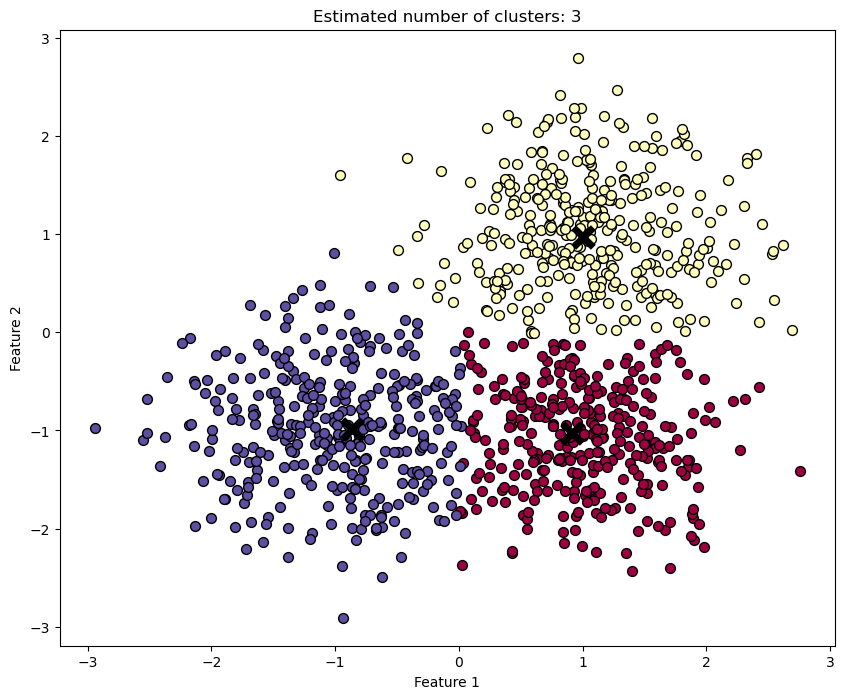

In [29]:
# Plot the clustered data
plt.figure(figsize=(10, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters))

for i in range(n_clusters):
    cluster_points = biz_df[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], marker='o', color=colors[i], edgecolor='k', s=50)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='k', s=200, linewidths=5, zorder=10)
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Cluster Separation: The separation between clusters indicates the distinctness of different groups in the data. Well-separated clusters suggest clear distinctions between groups, while overlapping clusters may indicate similarity or ambiguity between groups.

Outliers: Points that do not fall within any cluster or are far from the cluster centers can be considered outliers. These outliers may represent unusual or anomalous data points that do not conform to the patterns exhibited by the majority of data.

Spatial Relationships: The spatial relationships between clusters and data points can provide insights into the underlying structure of the data. For example, clusters that are closer together may represent similar groups, while clusters that are farther apart may represent more distinct groups.

Calculate the distances between each data point and its corresponding cluster center.
Then, determine outliers based on a threshold of 2 standard deviations from the mean distance.
Print the outliers by retrieving the corresponding rows from df using the outlier indices.

In [51]:
# Estimate bandwidth
bandwidth = estimate_bandwidth(biz_df[['tx_count', 'tx_sum_gbp']], quantile=0.2, n_samples=500)

# Fit MeanShift clustering algorithm
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(biz_df[['tx_count', 'tx_sum_gbp']])

# Get cluster centers
cluster_centers = ms.cluster_centers_

# Get labels
labels = ms.labels_

# Determine outliers
distances_to_center = np.linalg.norm(biz_df[['tx_count', 'tx_sum_gbp']] - cluster_centers[labels], axis=1)
outlier_indices = np.where(distances_to_center > np.mean(distances_to_center) + 2*np.std(distances_to_center))[0]


In [52]:
# Print outliers
print("Outliers:")
print(biz_df.iloc[outlier_indices])


Outliers:
                          name  tx_count  tx_sum_gbp  tx_mean_gbp  \
1                       A_CAFE    475154  1144734.25     2.409186   
2          A_LOCAL_COFFEE_SHOP    474159  1141932.30     2.408332   
14                COCKTAIL_BAR    123076  1366895.50    11.106109   
15                 COFFEE_SHOP    476099  1146046.25     2.407160   
26                     G&T_BAR    123219  1368650.00    11.107459   
68  TOTALLY_A_REAL_COFFEE_SHOP    476064  1145875.50     2.406978   
75                 WHISKEY_BAR    122900  1363735.00    11.096298   
77                    WINE_BAR    121995  1353191.50    11.092188   

    tx_median_gbp                            customers_sorted_unique  \
1             2.4  [1000.0, 1002.0, 1006.0, 1053.0, 1059.0, 1071....   
2             2.4  [1000.0, 1002.0, 1006.0, 1018.0, 1053.0, 1059....   
14           11.5  [1000.0, 1002.0, 1006.0, 1018.0, 1053.0, 1071....   
15            2.4  [1000.0, 1002.0, 1006.0, 1018.0, 1053.0, 1059....   
26      

Iterate over the distances to center and assign each data point to a risk category based on its distance.

In [53]:
# Define thresholds for categorization
threshold_low = np.mean(distances_to_center)
threshold_medium = np.mean(distances_to_center) + np.std(distances_to_center)

# Categorize data points
categories = []
for distance in distances_to_center:
    if distance < threshold_low:
        categories.append(1)
    elif distance < threshold_medium:
        categories.append(2)
    else:
        categories.append(3)

# Add categories to DataFrame
biz_df['Risk_Category'] = categories

# Print the DataFrame with Risk_Category
print(biz_df)

                      name  tx_count  tx_sum_gbp  tx_mean_gbp  tx_median_gbp  \
0           ACCESSORY_SHOP      3325    74862.00    22.514887          22.00   
1                   A_CAFE    475154  1144734.25     2.409186           2.40   
2      A_LOCAL_COFFEE_SHOP    474159  1141932.30     2.408332           2.40   
3            A_SUPERMARKET     81335  5652778.58    69.499952          65.22   
4                      BAR    770414  8458081.50    10.978619          11.00   
..                     ...       ...         ...          ...            ...   
74  WE_HAVE_BEAN_WEIGHTING      8596   237398.69    27.617344          27.73   
75             WHISKEY_BAR    122900  1363735.00    11.096298          11.50   
76            WHISKEY_SHOP      8800   234605.43    26.659708          19.99   
77                WINE_BAR    121995  1353191.50    11.092188          11.50   
78             WINE_CELLAR      8670   232540.25    26.821251          19.99   

                              customers

In [54]:
filtered_columns = ['name', 'industry_category', 'Risk_Category']
selected_data = biz_df[filtered_columns]
print(selected_data)

                      name      industry_category  Risk_Category
0           ACCESSORY_SHOP            Accessories              2
1                   A_CAFE                  Cafes              3
2      A_LOCAL_COFFEE_SHOP                  Cafes              3
3            A_SUPERMARKET           Supermarkets              1
4                      BAR            Pubs / Bars              1
..                     ...                    ...            ...
74  WE_HAVE_BEAN_WEIGHTING  Coffee Beans and Teas              1
75             WHISKEY_BAR            Pubs / Bars              3
76            WHISKEY_SHOP                Alcohol              1
77                WINE_BAR            Pubs / Bars              3
78             WINE_CELLAR                Alcohol              1

[79 rows x 3 columns]


The fill_value=0 argument fills missing values with 0 in case there are no data points for a particular combination of industry and risk category.

Table where each row represents an industry and each column represents a risk category, with the corresponding count of data points in each category.

In [55]:
# Group the DataFrame by 'industry_category' and 'Risk_Category', and then count the occurrences
industry_risk_counts = biz_df.groupby(['industry_category', 'Risk_Category']).size().unstack(fill_value=0)

# Print the count of data points in each risk category for each industry
print(industry_risk_counts)

Risk_Category             1  2  3
industry_category                
Accessories               0  2  0
Alcohol                   3  0  0
Apparel                   0  3  0
Books                     5  0  0
Cafes                     1  3  4
Children                  0  1  4
Coffee Beans and Teas     4  0  0
Dining                    6  3  0
Electronics / Technology  3  0  0
Gaming                    0  2  0
Gifts                     1  1  0
Hardware                  2  0  0
Health and fitness        1  0  0
Lunch / Light Meal        5  0  0
Pets                      2  0  0
Pubs / Bars               3  0  4
Specialty Foods           3  2  0
Sports                    4  0  0
Supermarkets              4  0  0
TV/Film                   3  0  0


Stacked bar plot where each bar represents an industry, and each segment of the bar represents the count of data points in a particular risk category.

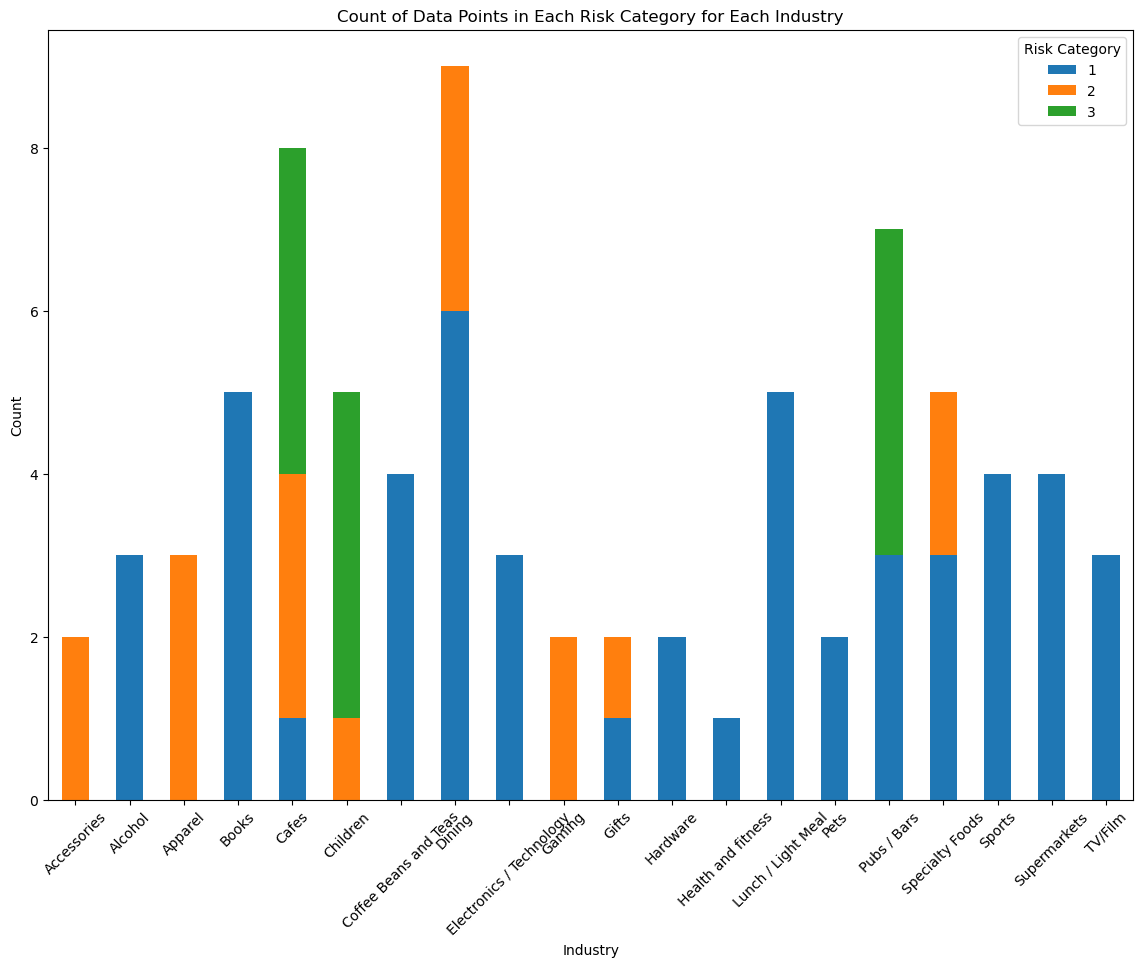

In [58]:
# Group the DataFrame by 'industry_category' and 'Risk_Category', and then count the occurrences
industry_risk_counts = biz_df.groupby(['industry_category', 'Risk_Category']).size().unstack(fill_value=0)

# Plot the count of data points in each risk category for each industry
industry_risk_counts.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Count of Data Points in Each Risk Category for Each Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Risk Category')
plt.show()

In [27]:
from sklearn.ensemble import IsolationForest

# Select numerical columns for anomaly detection
numerical_columns = ['tx_count', 'tx_sum_gbp', 'tx_mean_gbp', 'tx_median_gbp']

# Create a DataFrame with only numerical columns
X = biz_df[numerical_columns]

# Initialize the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.15, random_state=42)  # You can adjust the contamination parameter

# Fit the model to the data
isolation_forest.fit(X)

# Predict outliers
outliers = isolation_forest.predict(X)

# Add the outlier predictions to the DataFrame
biz_df['isolation_forest_outlier'] = outliers

# Display the DataFrame with outlier predictions
print(biz_df)


                      name  tx_count  tx_sum_gbp  tx_mean_gbp  tx_median_gbp  \
0           ACCESSORY_SHOP      3325    74862.00    22.514887          22.00   
1                   A_CAFE    475154  1144734.25     2.409186           2.40   
2      A_LOCAL_COFFEE_SHOP    474159  1141932.30     2.408332           2.40   
3            A_SUPERMARKET     81335  5652778.58    69.499952          65.22   
4                      BAR    770414  8458081.50    10.978619          11.00   
..                     ...       ...         ...          ...            ...   
74  WE_HAVE_BEAN_WEIGHTING      8596   237398.69    27.617344          27.73   
75             WHISKEY_BAR    122900  1363735.00    11.096298          11.50   
76            WHISKEY_SHOP      8800   234605.43    26.659708          19.99   
77                WINE_BAR    121995  1353191.50    11.092188          11.50   
78             WINE_CELLAR      8670   232540.25    26.821251          19.99   

                              customers

C:\Users\Diya\New folder\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [32]:
biz_df.head(20)

,name,tx_count,tx_sum_gbp,tx_mean_gbp,tx_median_gbp,customers_sorted_unique,customers_tx_count,industry_category,isolation_forest_outlier
0,ACCESSORY_SHOP,3325,74862.00,22.514887,22.00,"[1357.0, 1607.0, 1623.0, 1828.0, 1931.0, 2090....","[6, 10, 10, 5, 14, 6, 6, 7, 7, 5, 11, 9, 9, 9,...",Accessories,1
1,A_CAFE,475154,1144734.25,2.409186,2.40,"[1000.0, 1002.0, 1006.0, 1053.0, 1059.0, 1071....","[116, 53, 118, 55, 45, 55, 65, 57, 143, 50, 58...",Cafes,1
2,A_LOCAL_COFFEE_SHOP,474159,1141932.30,2.408332,2.40,"[1000.0, 1002.0, 1006.0, 1018.0, 1053.0, 1059....","[117, 46, 137, 4, 55, 40, 53, 55, 46, 130, 54,...",Cafes,1
3,A_SUPERMARKET,81335,5652778.58,69.499952,65.22,"[1000.0, 1002.0, 1006.0, 1018.0, 1053.0, 1059....","[2, 5, 16, 15, 3, 5, 4, 18, 16, 10, 11, 7, 4, ...",Supermarkets,-1
4,BAR,770414,8458081.50,10.978619,11.00,"[1000.0, 1002.0, 1006.0, 1018.0, 1053.0, 1059....","[72, 110, 104, 110, 98, 82, 117, 71, 139, 65, ...",Pubs / Bars,-1
5,BOOKSHOP,26186,324530.00,12.393264,12.00,"[1087.0, 1125.0, 1142.0, 1180.0, 1186.0, 1189....","[3, 12, 16, 15, 16, 17, 21, 1, 1, 1, 1, 13, 19...",Books,1
6,BUTCHER,93333,2097495.50,22.473246,22.45,"[1006.0, 1018.0, 1086.0, 1120.0, 1180.0, 1255....","[59, 46, 55, 56, 55, 44, 46, 48, 53, 42, 40, 5...",Specialty Foods,1
7,BUTCHERS,14905,294408.00,19.752298,18.00,"[1006.0, 1018.0, 1053.0, 1071.0, 1078.0, 1113....","[10, 1, 1, 1, 13, 6, 9, 4, 2, 14, 8, 8, 2, 1, ...",Specialty Foods,1
8,CAFE,111139,489245.50,4.402105,4.50,"[1000.0, 1002.0, 1006.0, 1018.0, 1053.0, 1059....","[5, 1, 3, 3, 45, 7, 4, 4, 5, 2, 12, 1, 6, 1, 5...",Cafes,1
9,CHILDRENDS_SHOP,16638,916095.00,55.060404,55.00,"[1018.0, 1053.0, 1059.0, 1071.0, 1078.0, 1086....","[1, 1, 6, 1, 8, 5, 3, 3, 1, 1, 1, 4, 7, 5, 1, ...",Children,1


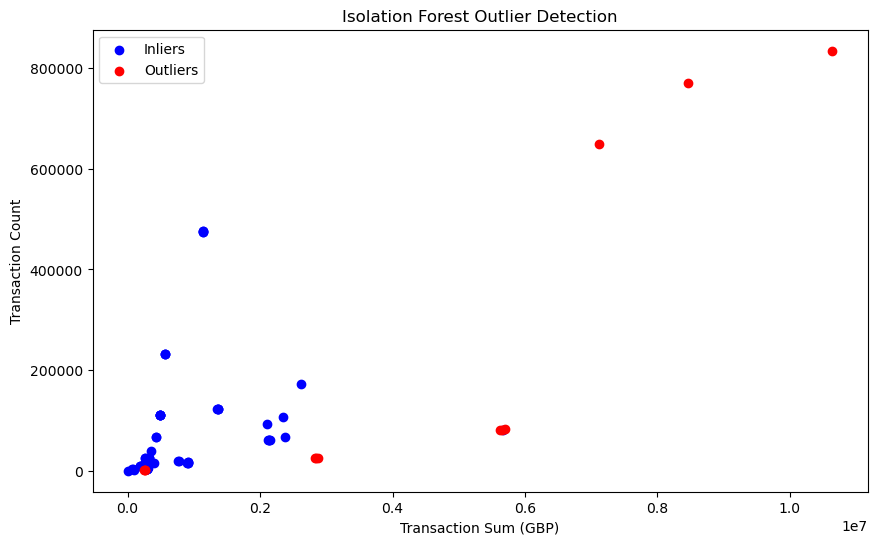

In [34]:
# Scatter plot of numerical columns with outliers highlighted
plt.figure(figsize=(10, 6))

# Plot inliers (outlier prediction == 1)
plt.scatter(biz_df.loc[biz_df['isolation_forest_outlier'] == 1, 'tx_sum_gbp'], biz_df.loc[biz_df['isolation_forest_outlier'] == 1, 'tx_count'], color='blue', label='Inliers')

# Plot outliers (outlier prediction == -1)
plt.scatter(biz_df.loc[biz_df['isolation_forest_outlier'] == -1, 'tx_sum_gbp'], biz_df.loc[biz_df['isolation_forest_outlier'] == -1, 'tx_count'], color='red', label='Outliers')

plt.xlabel('Transaction Sum (GBP)')
plt.ylabel('Transaction Count')
plt.title('Isolation Forest Outlier Detection')
plt.legend()
plt.show()


In [35]:
# Count the number of outliers
outlier_count = (biz_df['isolation_forest_outlier'] == -1).sum()
print("Number of outliers:", outlier_count)

Number of outliers: 12
